# Forecasting Annual Mean Cash Price Percentage Change

- In this notebook, I forecast the annual percentage change in cash price of cattle with weight greater than or equal to 500 lb
    - Cash price has a strong correlation to the futures price, as seen in [this notebook](futures_cash_price_analysis.ipynb)
    - Working assumption is that cash price drives futures price, as it is driven by end market participants
- For regression results, skip to section 'Multivariate Regression'

#### Content:

- Data Preparation
    - Supply Factors
    - Demand Factors
    - Cattle Cash Price
- Regression Analysis
    - Baseline Model
    - Multivariate Regression

In [104]:
import pandas as pd
import numpy as np
import src
import matplotlib.pyplot as plt
from src import *
from statsmodels.tools import add_constant

import warnings
warnings.filterwarnings('ignore')

# Data Preparation <a id='data-prep'></a>

### Supply and Demand Factors

All below factors are considered in annual percentage change basis.

Supply:
- Beef produced (LB) per capita
- Corn cash price ($/bsh)
    - Supply of beef is partly dictated by corn prices. Higher corn price --> margins too low for some operators --> decreased supply --> increased cattle price
    - corn cash price should be reflected in beef produced?

Demand:
- Supply per capita of chicken & pork (main substitutes)
- Consumer Confidence Index
- Beef exports
- GDP
- SP500 (i.e. asset prices)

## Supply Factors <a id='supply-factors'></a>

### Beef production 

In [105]:
beef_production = pd.read_csv('csv/beef_production_annual.csv')
beef_production = src.usda_clean_annual(beef_production, end_of_year=True, historical=True)

Text(0.5, 1.0, 'Beef Production (LB)')

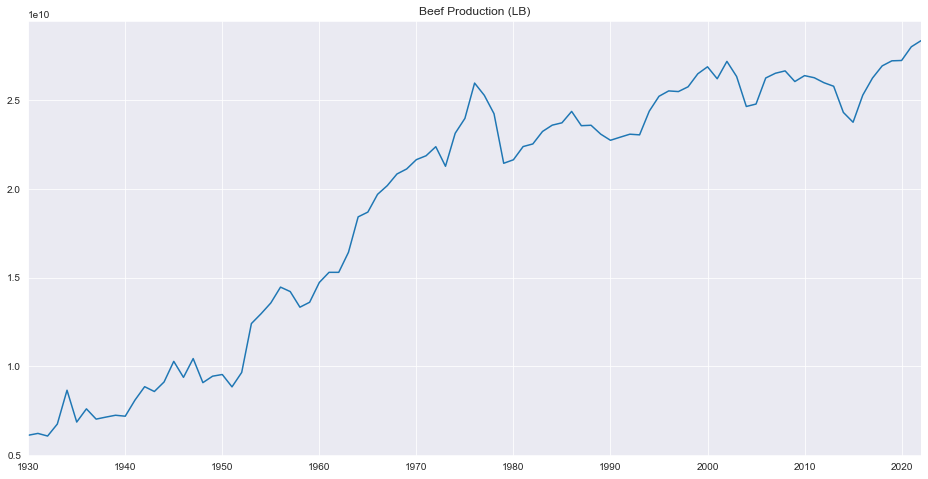

In [106]:
beef_production.plot()
plt.title("Beef Production (LB)")

In [107]:
us_population = get_us_population_historical_series()
us_population_annual = us_population.resample('Y').mean()

Text(0.5, 1.0, 'US Population')

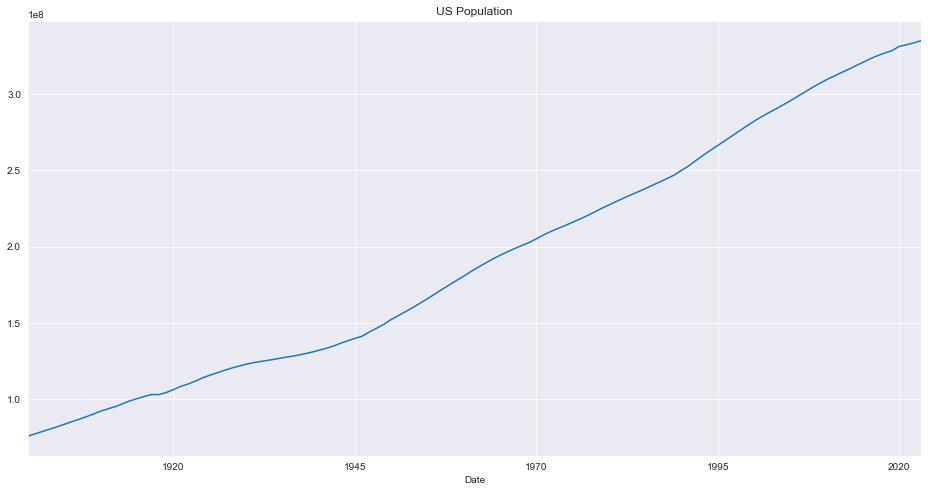

In [108]:
us_population_annual.plot()
plt.title('US Population')

Text(0.5, 1.0, 'Yearly Beef Production (LB) per Capita')

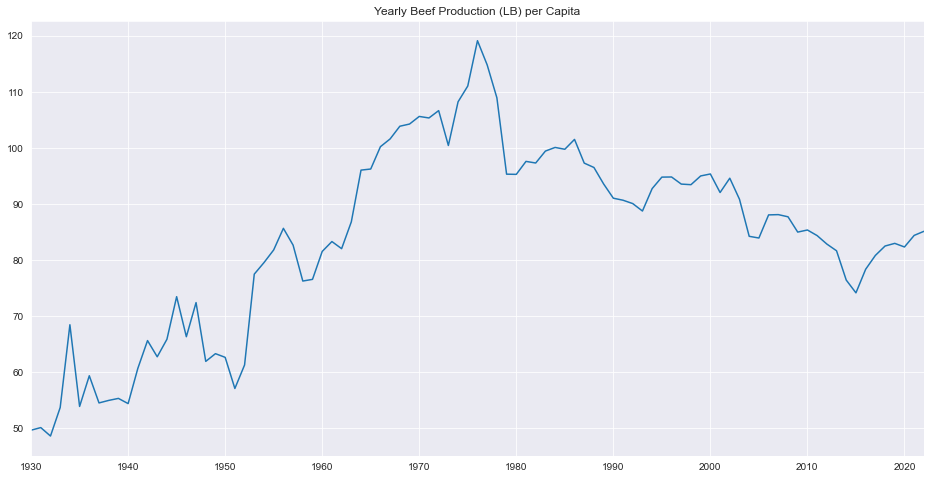

In [109]:
beef_production_per_capita_annual = (beef_production / us_population_annual).dropna()
beef_production_per_capita_annual.plot()

plt.title('Yearly Beef Production (LB) per Capita')

### Corn cash price

<AxesSubplot:>

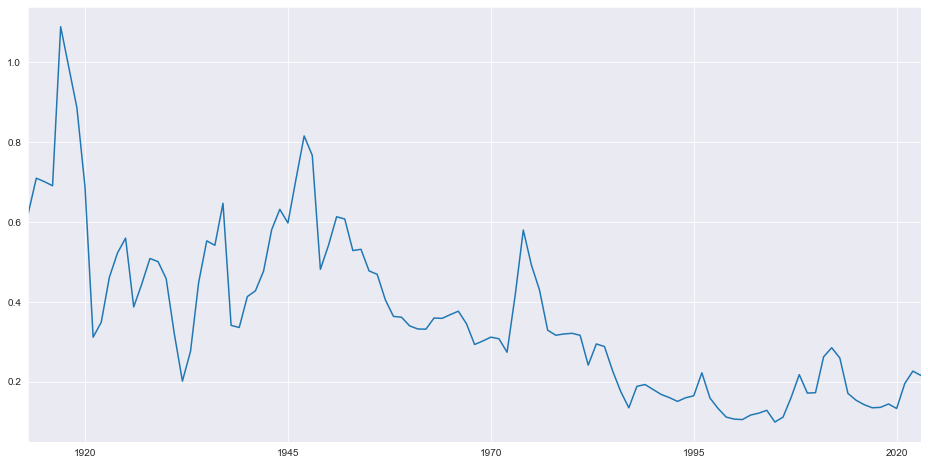

In [110]:
corn_price_received_per_bsh = pd.read_csv('csv/corn_price_received_per_bsh.csv')
corn_price_received_per_bsh = usda_clean_monthly(corn_price_received_per_bsh, historical=True)
corn_price_received_per_bsh_adj = src.adjust_series_cpi(corn_price_received_per_bsh)
corn_price_received_per_bsh_annual_adj = corn_price_received_per_bsh_adj.resample('Y').mean()

corn_price_received_per_bsh_annual_adj.plot()

## Demand Factors <a id='demand-factors'></a>

### Chicken slaughtered per capita

In [111]:
chicken_slaughtered_total_live_weight_annual = pd.read_csv('csv/chicken_slaughtered_total_live_weight_annual.csv')
chicken_slaughtered_total_live_weight_annual = usda_clean_annual(chicken_slaughtered_total_live_weight_annual, historical=True, end_of_year=True)

Text(0.5, 1.0, 'Chicken Slaughtered Total Live Weight LB (Annual)')

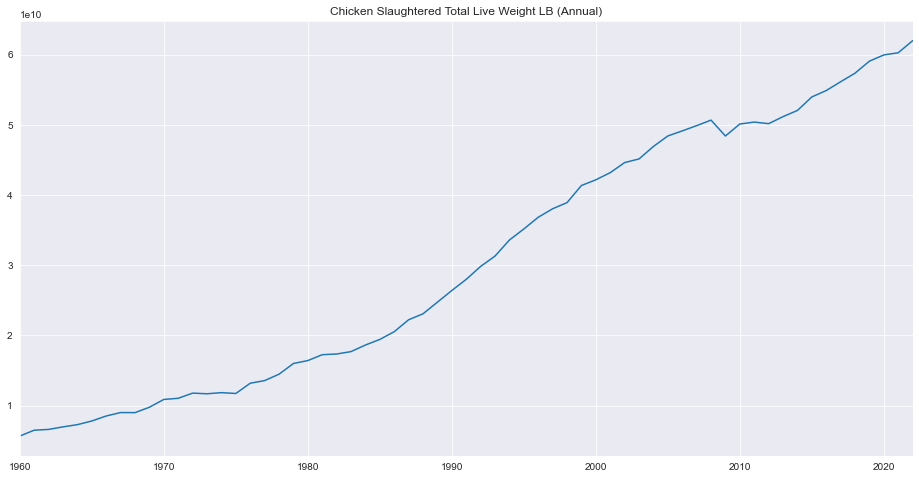

In [112]:
chicken_slaughtered_total_live_weight_annual.plot()
plt.title("Chicken Slaughtered Total Live Weight LB (Annual)")

Text(0.5, 1.0, 'Annual Chicken Slaughter Total Live Weight (LB) / capita')

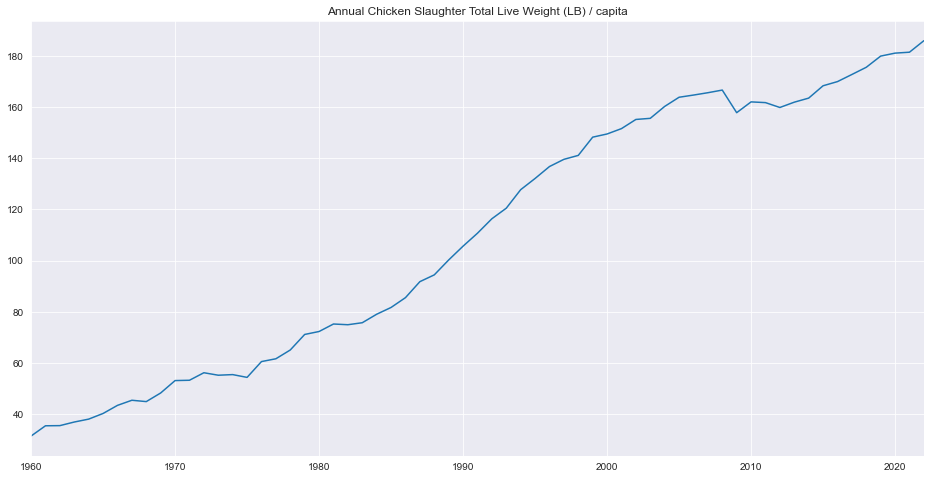

In [113]:
chicken_slaughtered_total_live_weight_annual_per_capita = (chicken_slaughtered_total_live_weight_annual / us_population_annual).dropna()
chicken_slaughtered_total_live_weight_annual_per_capita.plot()

plt.title('Annual Chicken Slaughter Total Live Weight (LB) / capita')

- Since 1960s chicken production per capita is increasing is steadily

### Pork production per capita

In [114]:
production_hogs_annual = pd.read_csv('csv/production_hogs_annual.csv')
production_hogs_annual = usda_clean_annual(production_hogs_annual, historical=True, end_of_year=True)

Text(0.5, 1.0, 'Hog Production (LB)')

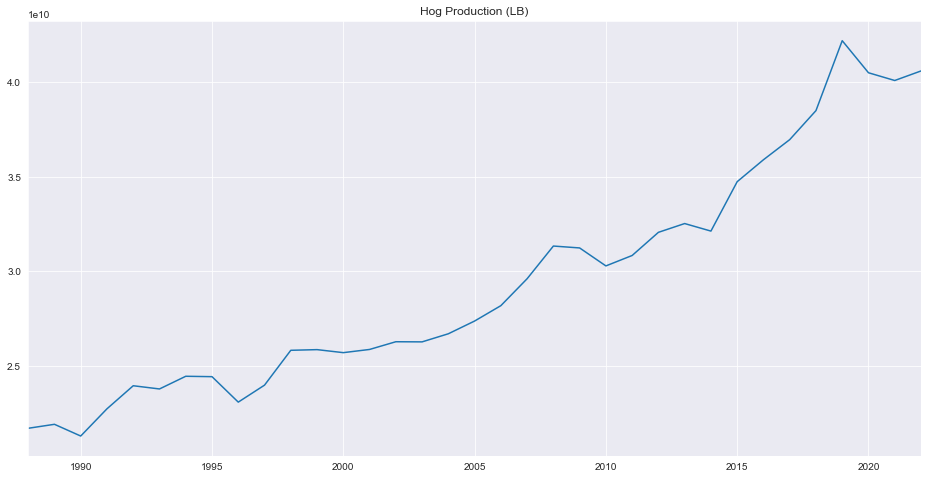

In [115]:
production_hogs_annual.plot()
plt.title("Hog Production (LB)")

Text(0.5, 1.0, 'Annual Hog Production (LB) / capita')

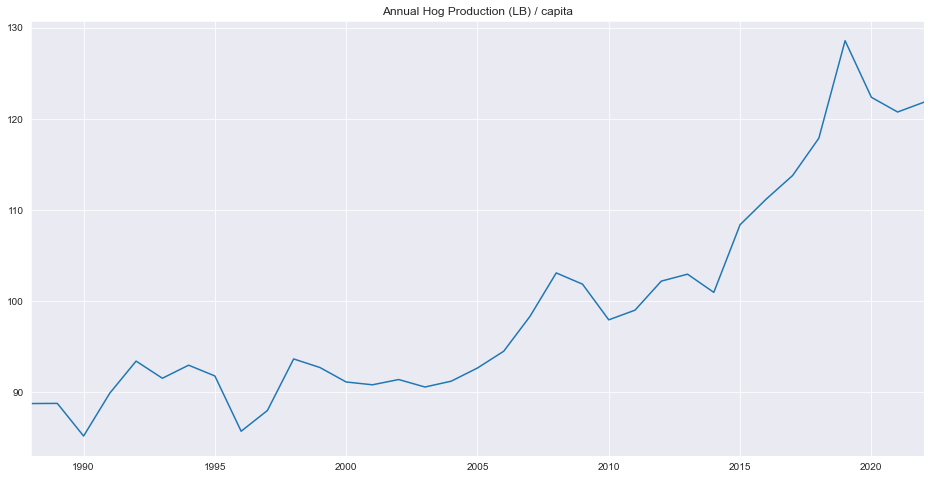

In [116]:
production_hogs_annual_annual_per_capita = (production_hogs_annual / us_population_annual).dropna()
production_hogs_annual_annual_per_capita.plot()

plt.title('Annual Hog Production (LB) / capita')

- Both pork and chicken have increasing supply / capita in US

### Consumer Confidence Index

In [117]:
# http://www.sca.isr.umich.edu/tables.html
cci = pd.read_csv('csv/michigan_univ_consumer_confidence.csv')
cci.index = pd.to_datetime(cci['TIME'], format= '%Y-%m')
cci = cci.Value
cci_annual = cci.resample('Y').mean()

Text(0.5, 1.0, 'Michican University Consumer Confidence Index')

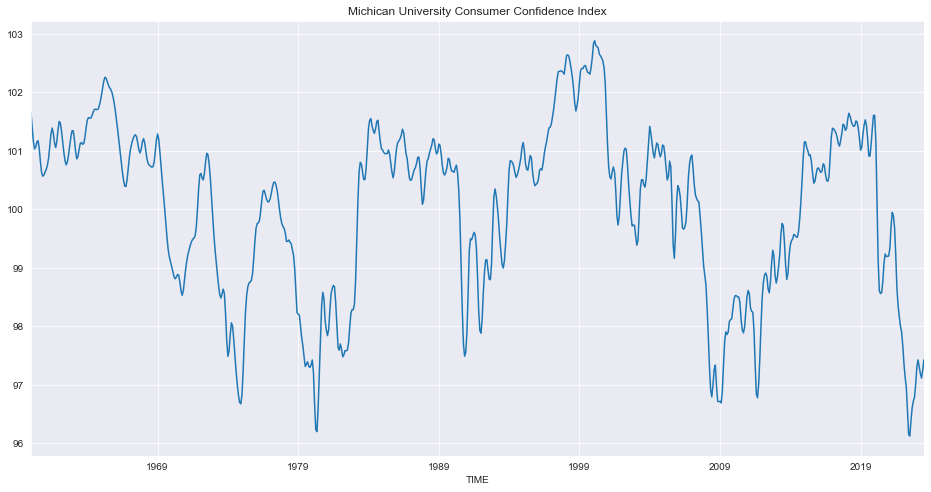

In [118]:
cci.plot()

plt.title('Michican University Consumer Confidence Index')

### Beef Exports

In [119]:
beef_export = pd.read_csv('csv/export_beef_veal_fr_ch_fz_monthly2.csv')
beef_export = clean_fas_data(beef_export)

<AxesSubplot:xlabel='Date'>

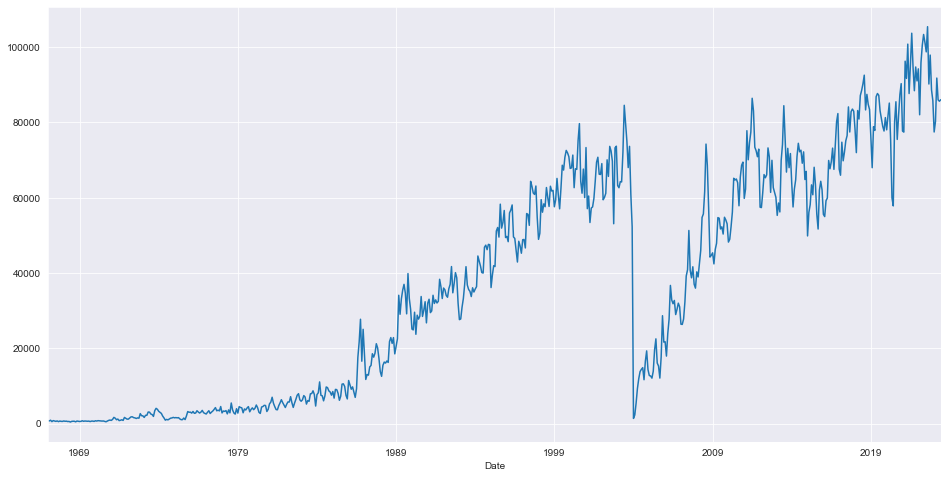

In [120]:
beef_export.plot()

In [121]:
print(beef_export.pct_change().idxmin())
print(beef_export.pct_change().min())

2004-01-01 00:00:00
-0.9736654899546016


- Largest drop in exports was in Jan 2004 -97%
- 'On December 23, 2003, the U.S. Department of Agriculture (USDA) announced a presumptive diagnosis of the first known case of BSE in the United States.'

<AxesSubplot:xlabel='Date'>

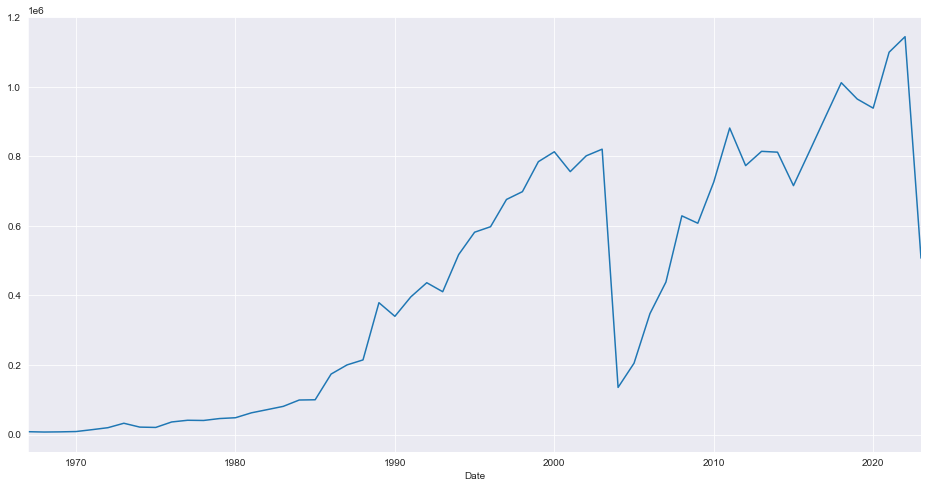

In [122]:
# change to annual
beef_export_annual = beef_export.resample('A').sum()
beef_export_annual.plot()

### SP500

In [123]:
sp500 = src.get_sp500_historical_series()
sp500_annual_adj = src.adjust_series_cpi(sp500.resample('Y').mean())

<AxesSubplot:>

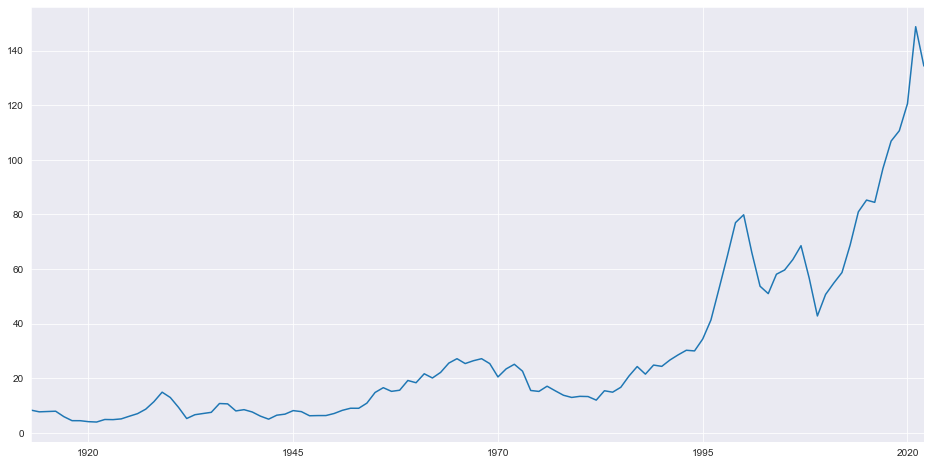

In [124]:
sp500_annual_adj.plot()

## Cattle Cash Price (greater than 500 LB) <a id='cattle-price'></a>

In [125]:
price_received_ge_500_national = pd.read_csv('csv/price_received_ge_500_national.csv')
price_received_ge_500_national = usda_clean_monthly(price_received_ge_500_national, historical=True)
price_received_ge_500_national_annual = price_received_ge_500_national.resample('Y').mean()

<AxesSubplot:xlabel='Date'>

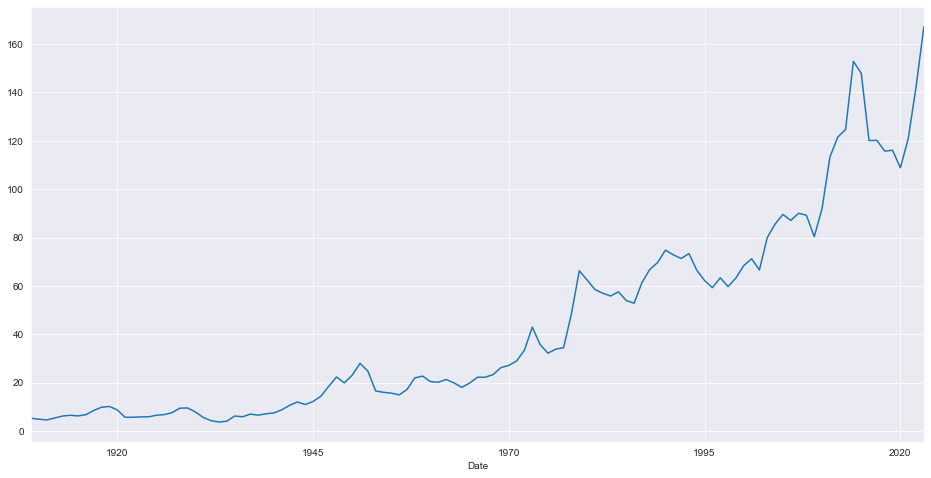

In [126]:
price_received_ge_500_national_annual.plot()

<AxesSubplot:>

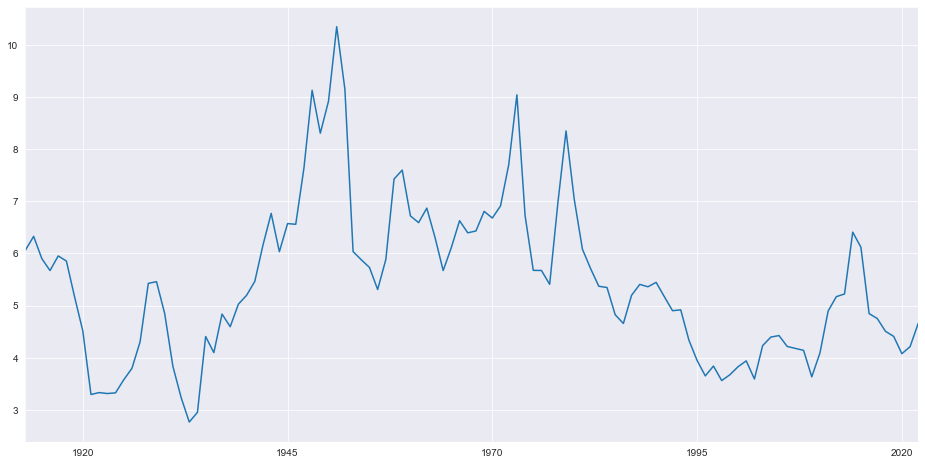

In [127]:
price_received_ge_500_national_annual_adj = adjust_series_cpi(price_received_ge_500_national_annual)
price_received_ge_500_national_annual_adj.plot()

- Adjusting for inflation, cash price of cattle has not changed too much (context of 100+ yr history)

Mean: 0.50%
Std: 12.31%


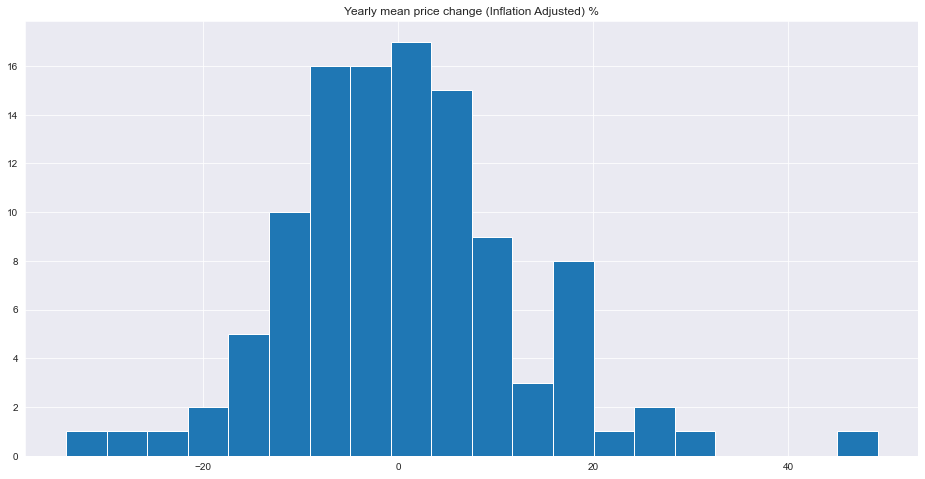

In [128]:
(adjust_series_cpi(price_received_ge_500_national_annual).pct_change()*100).hist(bins=20)

plt.title('Yearly mean price change (Inflation Adjusted) %')

print(f"Mean: {adjust_series_cpi(price_received_ge_500_national_annual).pct_change().mean()*100:.2f}%")
print(f"Std: {adjust_series_cpi(price_received_ge_500_national_annual).pct_change().std()*100:.2f}%")

# Regression Analysis <a id='reg-analysis'></a>

## Model Baseline <a id='baseline'></a>

- Baseline all following models to a simple AR(1) model, where we predict next year's cash price to to this years cash price - i.e. always predict the percentage change in price is 0 between years

In [129]:
# Since we predict the % change between years to be 0, any percentage change is considered an 'error'
ar1_mae = abs(price_received_ge_500_national_annual_adj.pct_change()*100).dropna().mean()

print(f'Mean absolute error of AR(1) model: {round(ar1_mae,2)} %')

Mean absolute error of AR(1) model: 9.14 %


In [130]:
data = pd.concat(
    [
        price_received_ge_500_national_annual_adj,     # Dependent variable
        beef_production_per_capita_annual,      # Independent variable - Supply Factors
        corn_price_received_per_bsh_annual_adj,
        chicken_slaughtered_total_live_weight_annual_per_capita, # Independent variable - Demand Factors
        production_hogs_annual_annual_per_capita,
        cci_annual,
        beef_export_annual,
        sp500_annual_adj
    ], axis=1
)

data.columns = [
    "price_received_ge_500_national_annual_adj",
    "beef_production_per_capita_annual",
    "corn_price_received_per_bsh_annual_adj",
    "chicken_slaughtered_total_live_weight_annual_per_capita",
    "production_hogs_annual_annual_per_capita",
    "cci_annual",
    "beef_export_annual",
    "sp500_annual_adj"
]

data = data.dropna()

data_pct_change = (data.pct_change()*100).dropna()

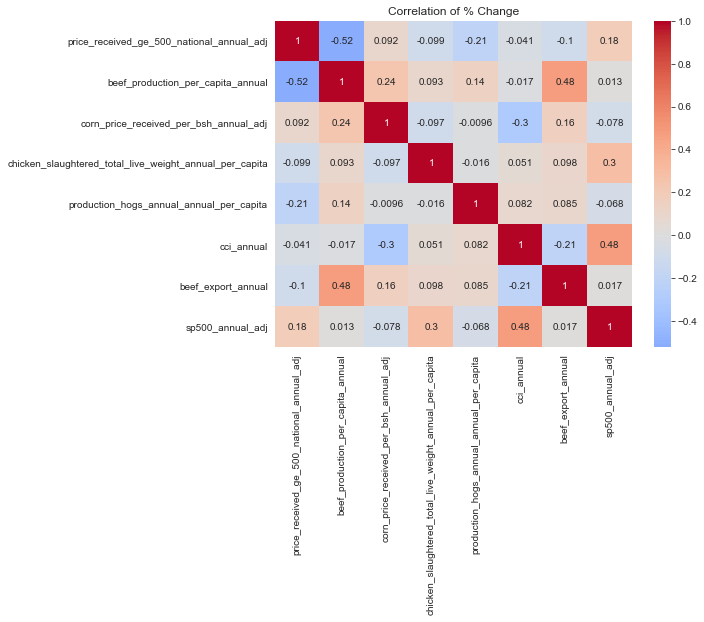

In [131]:
correlation_matrix = data_pct_change.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of % Change')
plt.show()


## Multivariate Linear Regression <a id='multreg'></a>

In [132]:
import statsmodels.api as sm

y = data_pct_change.iloc[:, 0]
X = data_pct_change.iloc[:, 1:]

model = sm.OLS(y, X).fit()

print(model.summary())

                                            OLS Regression Results                                            
Dep. Variable:     price_received_ge_500_national_annual_adj   R-squared (uncentered):                   0.405
Model:                                                   OLS   Adj. R-squared (uncentered):              0.250
Method:                                        Least Squares   F-statistic:                              2.620
Date:                                       Mon, 04 Sep 2023   Prob (F-statistic):                      0.0335
Time:                                               21:16:49   Log-Likelihood:                         -114.37
No. Observations:                                         34   AIC:                                      242.7
Df Residuals:                                             27   BIC:                                      253.4
Df Model:                                                  7                                                  
C

- Beef production per capita annual is the only dependent variable with statistically significant coefficient
- Negative coefficients of chicken and hog supply are expected
    - More chicken & hog supply -> lower price for these --> cheaper substitutes for beef --> lower demand for beef --> lower beef price
- SP500 has positive coefficient

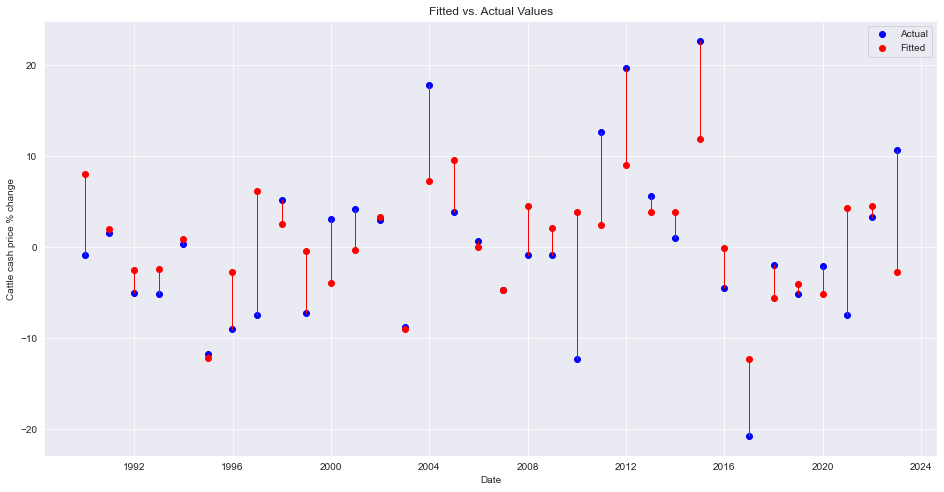

In [133]:
y_fitted = model.predict(X)
# src.plot_fitted_actual(y, y_fitted)

fig, ax = plt.subplots()


ax.scatter(y_fitted.index, y, label='Actual', color='blue')
ax.scatter(y_fitted.index, y_fitted, label='Fitted', color='red')

# Draw interconnecting line from predicted to actual
for i in range(len(y_fitted)):
    ax.plot([data_pct_change.index[i], data_pct_change.index[i]], [y_fitted[i], y[i]], color='red', linewidth=1)

ax.set_xlabel('Date')
ax.set_ylabel('Cattle cash price % change')
ax.set_title('Fitted vs. Actual Values')

ax.legend()
plt.show()


- years where fitted values are off:
    - 1996, 2010, 2022

In [134]:
import numpy as np

print(f'Correct directional forecast: {np.mean([1 if i > 0 else 0 for i in y*y_fitted])*100:.2f}%')

Correct directional forecast: 70.59%


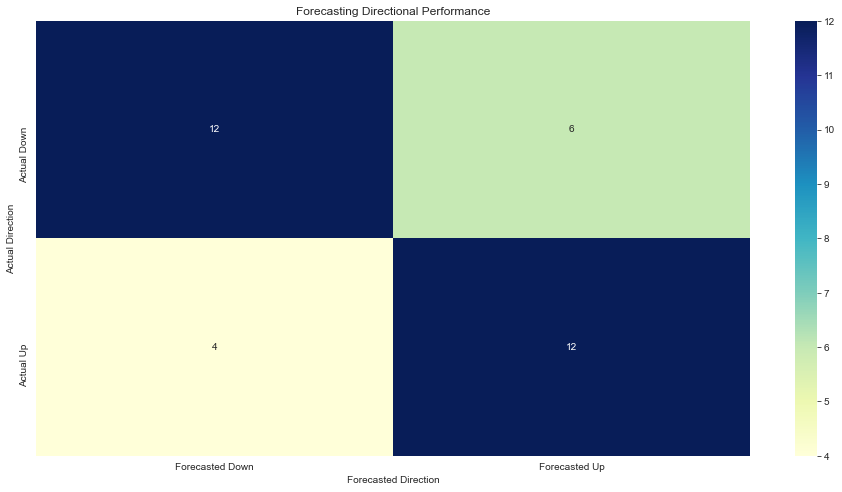

In [135]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_true = [1 if i > 0 else 0 for i in y]
y_pred = [1 if i > 0 else 0 for i in y_fitted]

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, cmap='YlGnBu', xticklabels=['Forecasted Down', 'Forecasted Up'], yticklabels=['Actual Down', 'Actual Up'])

plt.title('Forecasting Directional Performance')
plt.xlabel('Forecasted Direction')
plt.ylabel('Actual Direction')

plt.show()

### Regress with lag of 1

- Repeat with a lag of one year for independent and dependent variables (since cattle life span is typically <2 years)

In [136]:
# create a lag of 1 for all independent variables
X_lagged = X.shift(1)
X_lagged = X_lagged.dropna()

# rename the columns of the lagged DataFrame
X_lagged = X_lagged.add_suffix('_lag1')

y_lagged = y.shift(1)
y_lagged.name = y.name + '_lag1'

# concatenate the original and lagged independent variables
X_concat_lagged = pd.concat([X, X_lagged, y_lagged], axis=1)
X_concat_lagged = X_concat_lagged.dropna()

# fit the model with the original and lagged independent variables
model_lag1 = sm.OLS(y[X_concat_lagged.index], X_concat_lagged).fit()

# print the model summary
print(model_lag1.summary())

                                            OLS Regression Results                                            
Dep. Variable:     price_received_ge_500_national_annual_adj   R-squared (uncentered):                   0.665
Model:                                                   OLS   Adj. R-squared (uncentered):              0.386
Method:                                        Least Squares   F-statistic:                              2.383
Date:                                       Mon, 04 Sep 2023   Prob (F-statistic):                      0.0408
Time:                                               21:16:50   Log-Likelihood:                         -101.99
No. Observations:                                         33   AIC:                                      234.0
Df Residuals:                                             18   BIC:                                      256.4
Df Model:                                                 15                                                  
C

- Note how beef production has a negative coefficient, yet it's lagged value has a positive coefficeint
    - means that all else equal, a +5 % production, followed next year with -5% production, is more bulish than -5 % on both years


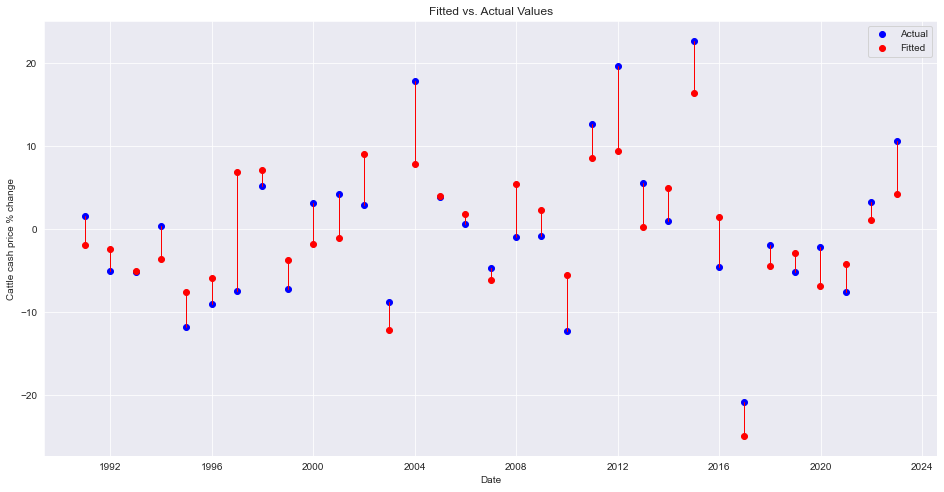

In [137]:
y_fitted_lag1 = model_lag1.predict(X_concat_lagged)
# src.plot_fitted_actual(y, y_fitted)

fig, ax = plt.subplots()


ax.scatter(y[1:].index, y[1:], label='Actual', color='blue')
ax.scatter(y_fitted_lag1.index, y_fitted_lag1, label='Fitted', color='red')

# Draw interconnecting line from predicted to actual
for i in range(len(y_fitted_lag1)):
    ax.plot([y_fitted_lag1.index[i], y[1:].index[i]], [y_fitted_lag1[i], y[1:][i]], color='red', linewidth=1)

ax.set_xlabel('Date')
ax.set_ylabel('Cattle cash price % change')
ax.set_title('Fitted vs. Actual Values')

ax.legend()
plt.show()